In [2]:
import pandas as pd
import numpy as np
cancer_df=pd.read_csv('cancerdata.csv')
cancer_df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
2,34,1,?,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,?,?,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,?,?,0,0,0,0,0,0,0,0


In [3]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null object
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:cervical condylomatosis          858 non-null object
STDs:vaginal condylomatosi

In [4]:
## dropping two columns of STDs as it does not give much information because of missing data

cancer_df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],inplace=True,axis=1)

In [5]:
cancer_df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#divideing numerical and categorical data in the Dataset.
numerical_df = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']
categorical_df = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis',
                  'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS', 
                  'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN', 
                  'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller','Citology', 'Biopsy']

In [7]:
#hear i have replaced all the missing values with NaN 
cancer_df=cancer_df.replace('?',np.NaN)

In [8]:
#filling the missing values with mean for numerical data
for feature in numerical_df:
    print(feature,'',cancer_df[feature].convert_objects(convert_numeric=True).mean())
    feature_mean = round(cancer_df[feature].convert_objects(convert_numeric=True).mean(),1)
    cancer_df[feature] = cancer_df[feature].fillna(feature_mean)

Age  26.82051282051282
Number of sexual partners  2.527644230769231
First sexual intercourse  16.995299647473562
Num of pregnancies  2.275561097256858
Smokes (years)  1.2197214125857985
Smokes (packs/year)  0.45314395065562113
Hormonal Contraceptives (years)  2.2564192013893343
IUD (years)  0.514804318488529
STDs (number)  0.17662682602921648


C:\Users\motam\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\motam\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


In [9]:
for feature in categorical_df:
    cancer_df[feature] = cancer_df[feature].convert_objects(convert_numeric=True).fillna(1.0)

C:\Users\motam\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [10]:
cancer_df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


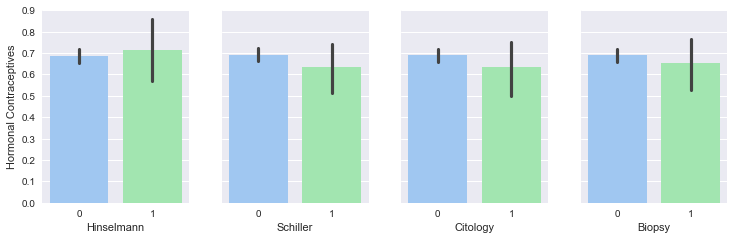

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns
category_df = ['Hinselmann', 'Schiller','Citology', 'Biopsy']
g = sns.PairGrid(cancer_df,
                 y_vars=['Hormonal Contraceptives'],
                 x_vars= category_df,
                 aspect=.75, size=3.5)
g.map(sns.barplot, palette="pastel");

In [12]:
print('Mean age of the Women facing the risk of Cervical cancer',cancer_df['Age'].mean())

Mean age of the Women facing the risk of Cervical cancer 26.82051282051282


From the below plots it can be seen that the mean age of the women facing the risk of cervicakl cancer is 26. Also the women with the age in range of 20 to 35 have the highest chances of developing the risk of cervical cancer. The peaks at age of 50 and the furthur extension of the density plot indicate that some of the women face the risk of cervical cancer even at that age.


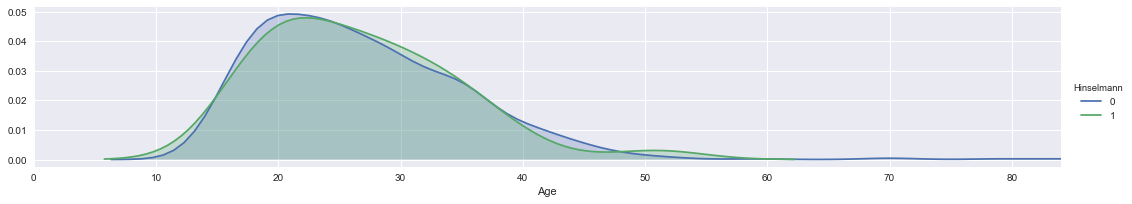

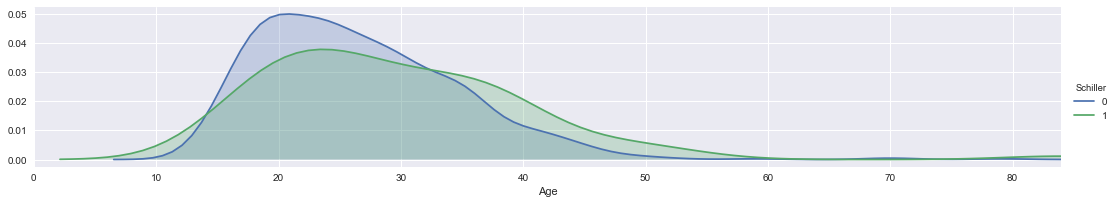

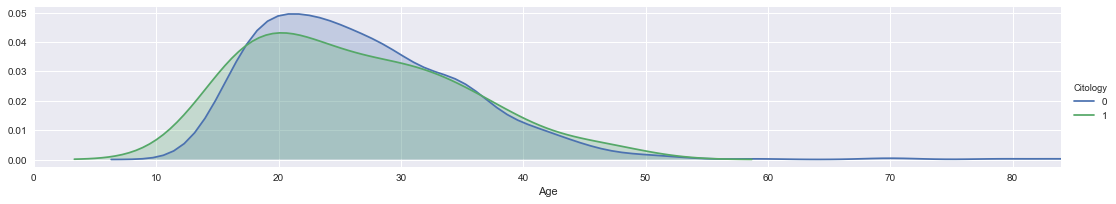

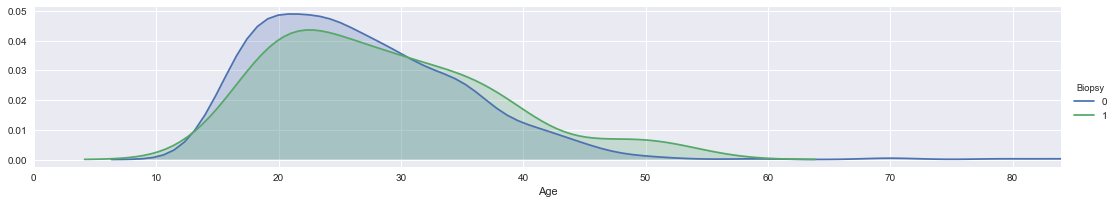

In [13]:
for feature in category_df:
 as_fig = sns.FacetGrid(cancer_df,hue=feature,aspect=5)
 as_fig.map(sns.kdeplot,'Age',shade=True)
 oldest = cancer_df['Age'].max()
 as_fig.set(xlim=(0,oldest))
 as_fig.add_legend()
print('From the below plots it can be seen that the mean age of the women facing the risk of cervicakl cancer is 26. Also the women with the age in range of 20 to 35 have the highest chances of developing the risk of cervical cancer. The peaks at age of 50 and the furthur extension of the density plot indicate that some of the women face the risk of cervical cancer even at that age.')

As age of women increases, the number of sexual partners increases which increases the possibility of getting tumor. So we can consider that Number of Sexual partners as a key feature in detecting the Cervical Cancer.


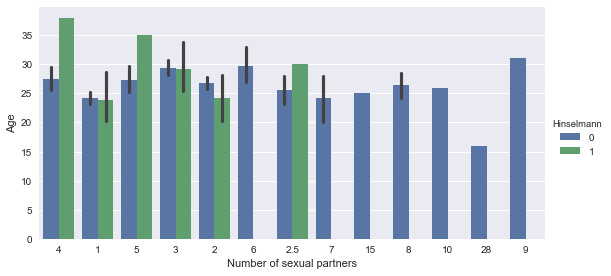

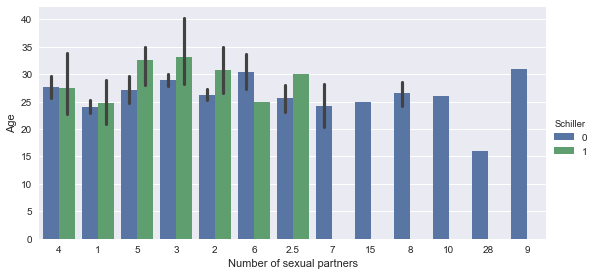

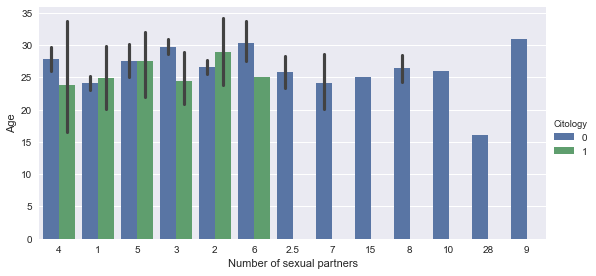

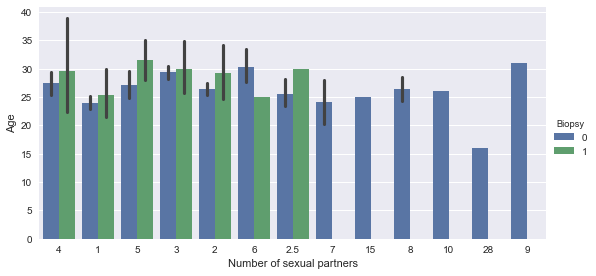

In [14]:
for feature in category_df:
  sns.factorplot(x='Number of sexual partners',y='Age',hue=feature,data=cancer_df,aspect=1.95,kind='bar');
print('As age of women increases, the number of sexual partners increases which increases the possibility of getting tumor. So we can consider that Number of Sexual partners as a key feature in detecting the Cervical Cancer.')

In [15]:
cancer_df['Number of sexual partners'] = round(cancer_df['Number of sexual partners'].convert_objects(convert_numeric=True))
cancer_df['First sexual intercourse'] = cancer_df['First sexual intercourse'].convert_objects(convert_numeric=True)
cancer_df['Num of pregnancies']=round(cancer_df['Num of pregnancies'].convert_objects(convert_numeric=True))
cancer_df['Smokes'] = cancer_df['Smokes'].convert_objects(convert_numeric=True)
cancer_df['Smokes (years)'] = cancer_df['Smokes (years)'].convert_objects(convert_numeric=True)
cancer_df['Hormonal Contraceptives'] = cancer_df['Hormonal Contraceptives'].convert_objects(convert_numeric=True)
cancer_df['Hormonal Contraceptives (years)'] = cancer_df['Hormonal Contraceptives (years)'].convert_objects(convert_numeric=True)
cancer_df['IUD (years)'] = cancer_df['IUD (years)'].convert_objects(convert_numeric=True)

C:\Users\motam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\Users\motam\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Users\motam\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\motam\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.
C:\Users\

Women who have taken the harmonal contraceptives for more than five years have the higher risk of cervical cancer. The small peaks at the age 10 & 15 shows even higher risk than women who have not used the contraceptives.


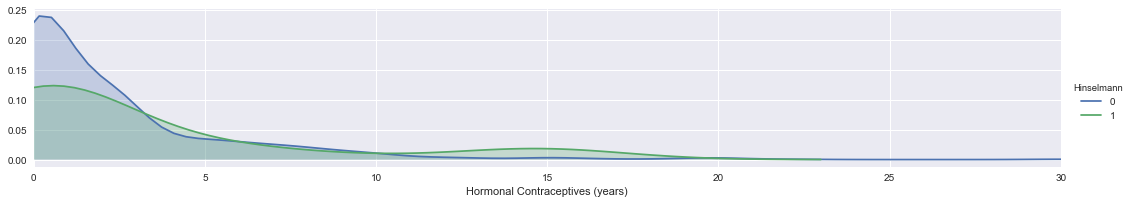

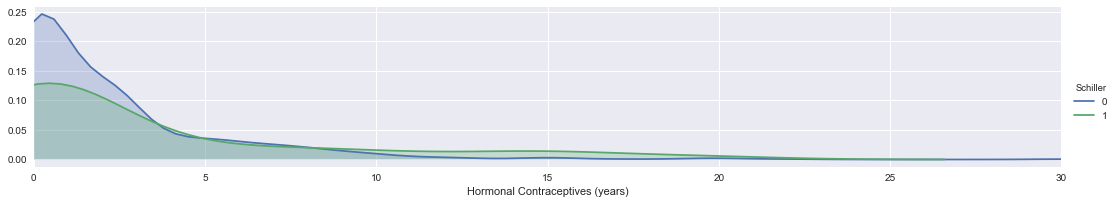

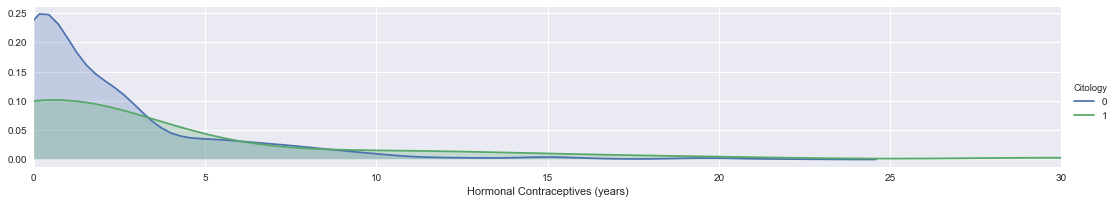

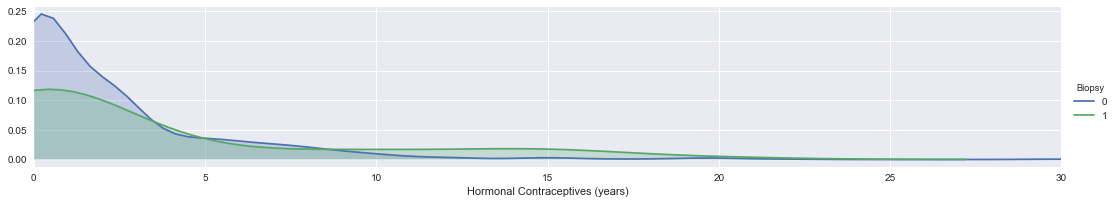

In [16]:
for feature in category_df:
 as_fig = sns.FacetGrid(cancer_df,hue=feature,aspect=5)
 as_fig.map(sns.kdeplot,'Hormonal Contraceptives (years)',shade=True)
 hc = cancer_df['Hormonal Contraceptives (years)'].max()
 as_fig.set(xlim=(0,hc))
 as_fig.add_legend()
print('Women who have taken the harmonal contraceptives for more than five years have the higher risk of cervical cancer. The small peaks at the age 10 & 15 shows even higher risk than women who have not used the contraceptives.')
cancer_df.drop('Hormonal Contraceptives',axis=1,inplace=True)

C:\Users\motam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


Mean age of the women who started the sexual intercourse 16.995337995337994


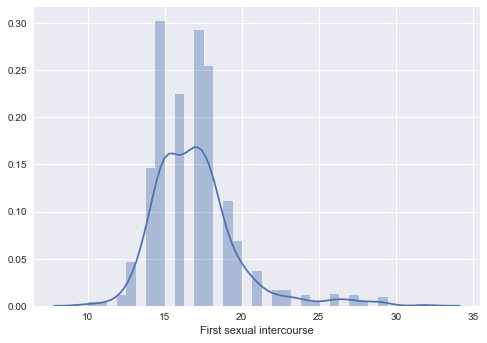

In [17]:
sns.distplot(cancer_df['First sexual intercourse'].convert_objects(convert_numeric=True))
print('Mean age of the women who started the sexual intercourse',cancer_df['First sexual intercourse'].mean())

The below density plots shows that the women who started the Sexual intercourse at the age of 15 to 20 are having the high chances of risk.So we can consider even this as the key feature in detecting the Cervical cancer.


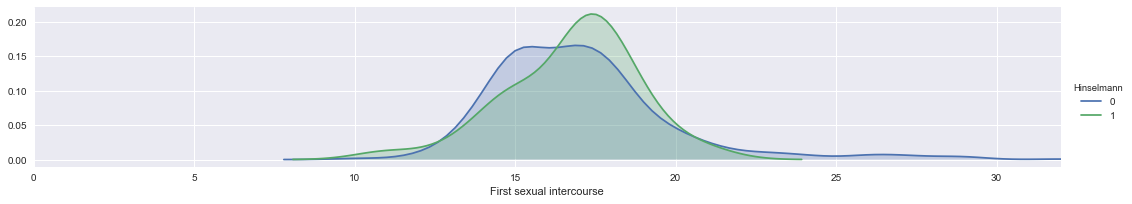

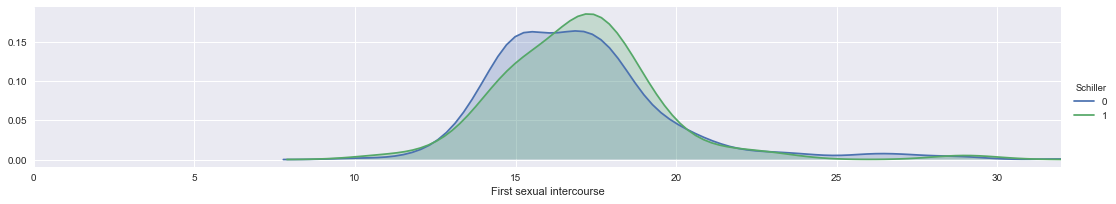

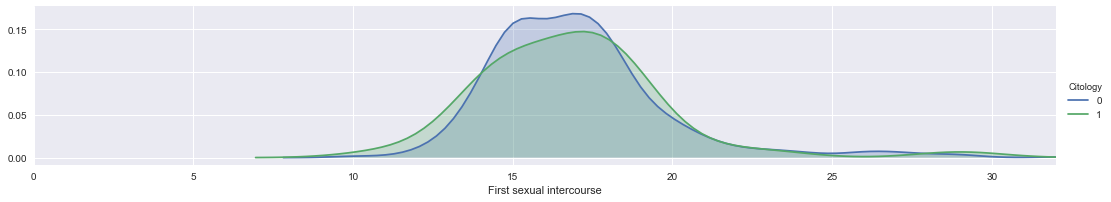

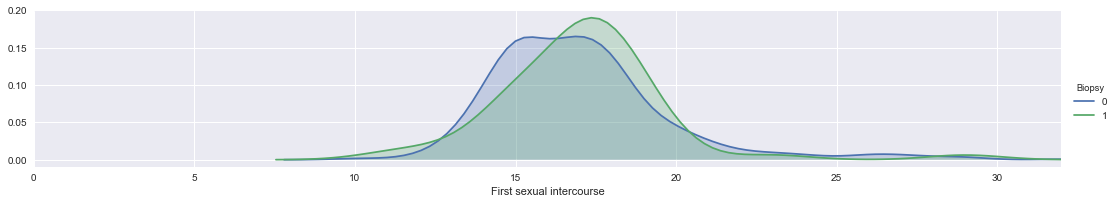

In [18]:
for feature in category_df:
    as_fig = sns.FacetGrid(cancer_df,hue=feature,aspect=5)
    as_fig.map(sns.kdeplot,'First sexual intercourse',shade=True)
    oldest = cancer_df['First sexual intercourse'].max()
    as_fig.set(xlim=(0,oldest))
    as_fig.add_legend()
print("The below density plots shows that the women who started the Sexual intercourse at the age of 15 to 20 are having the high chances of risk.So we can consider even this as the key feature in detecting the Cervical cancer.")

In [19]:
#checking whether there is any relation between 
#number of pregnencies and number of sexual partners
cancer_df['Number of sexual partners'].corr(cancer_df['Num of pregnancies'])

0.07743921250933386

In [20]:
preg_table = pd.crosstab(index=cancer_df["Hinselmann"],columns=(cancer_df["Num of pregnancies"],cancer_df['Number of sexual partners']))

preg_table

Num of pregnancies        0.0              1.0                      ...  6.0   \
Number of sexual partners  1.0 2.0 3.0 4.0  1.0 2.0 3.0 4.0 5.0 6.0 ...   5.0   
Hinselmann                                                          ...         
0                            5   5   5   1   81  86  49  25  13   2 ...     1   
1                            0   0   0   0    4   1   2   0   0   0 ...     0   

Num of pregnancies            7.0              8.0      10.0 11.0  
Number of sexual partners 6.0  1.0 2.0 3.0 5.0  3.0 4.0  1.0  3.0  
Hinselmann                                                         
0                           1    1   3   1   1    1   1    1    1  
1                           0    0   0   0   0    0   0    0    0  

[2 rows x 58 columns]

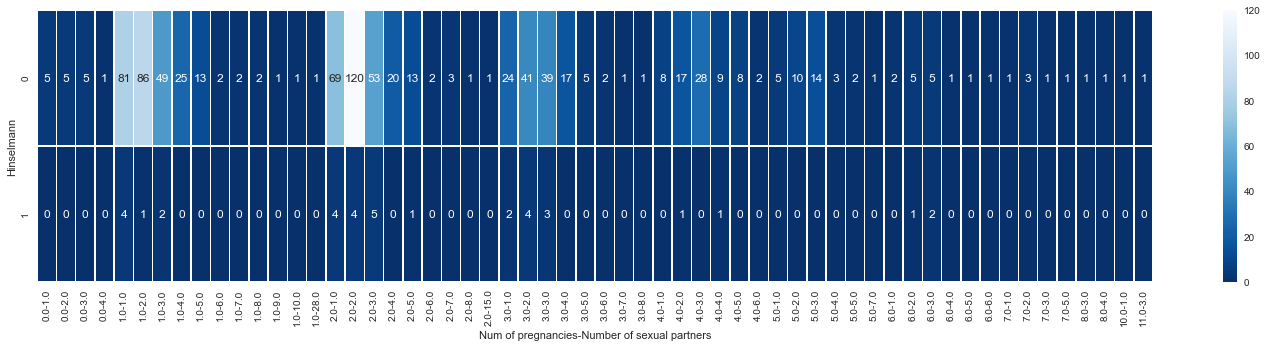

In [21]:
fig, ax = plt.subplots(figsize=(25,5))  
sns.heatmap(preg_table,annot=True, fmt="d",cmap="Blues_r",linewidths=0.5,ax=ax)

In [22]:
print('corelation between Smokes and Smokes(years)')
cancer_df['Smokes'].corr(cancer_df['Smokes (years)'])

corelation between Smokes and Smokes(years)


0.6927983105817399

In [23]:
print('correlation between Smokes ans smokes(pack/years)')
cancer_df['Smokes (packs/year)'] = cancer_df['Smokes (packs/year)'].convert_objects(convert_numeric=True)
cancer_df['Smokes'].corr(cancer_df['Smokes (packs/year)'])

correlation between Smokes ans smokes(pack/years)


C:\Users\motam\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


0.47352406228042404

In [24]:
print('From the three columns/features (Smokes, Smokes (years), Smokes (packs/year)) we can remove the column Smokes because Smokes (years) will represent the Smokes column because Smoke (years) column has non-zero value only when Smokes column has non-zero value. Also, the predictions depends on the number of years the person is smoking rather than just whether the smokes or not')
cancer_df.drop('Smokes',axis=1,inplace=True)

cancer_df.drop('Dx',axis=1,inplace=True)
cancer_df.drop('IUD',axis=1,inplace=True)

From the three columns/features (Smokes, Smokes (years), Smokes (packs/year)) we can remove the column Smokes because Smokes (years) will represent the Smokes column because Smoke (years) column has non-zero value only when Smokes column has non-zero value. Also, the predictions depends on the number of years the person is smoking rather than just whether the smokes or not


Based on the distribution of data points in the scatter plot, the schiller and Biopsy tests are showing that women who are smoking for more than 5 years are having more chances of getting the tumor.


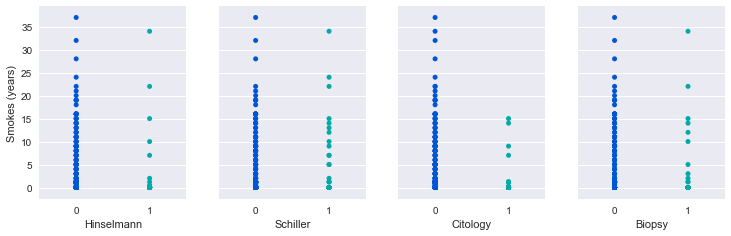

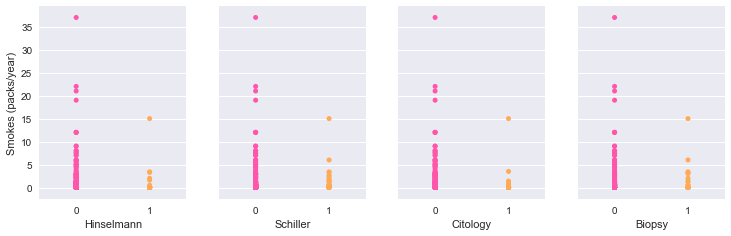

In [25]:
g = sns.PairGrid(cancer_df,
                 y_vars=['Smokes (years)'],
                 x_vars= category_df,
                 aspect=.75, size=3.5)
g.map(sns.stripplot, palette="winter");

g = sns.PairGrid(cancer_df,
                 y_vars=['Smokes (packs/year)'],
                 x_vars= category_df,
                 aspect=.75, size=3.5)
g.map(sns.stripplot, palette="spring");
print('Based on the distribution of data points in the scatter plot, the schiller and Biopsy tests are showing that women who are smoking for more than 5 years are having more chances of getting the tumor.')

The distribution of zero(negative test result) shows that the IUD used for any number of years has less chance of facing risk of cancer.


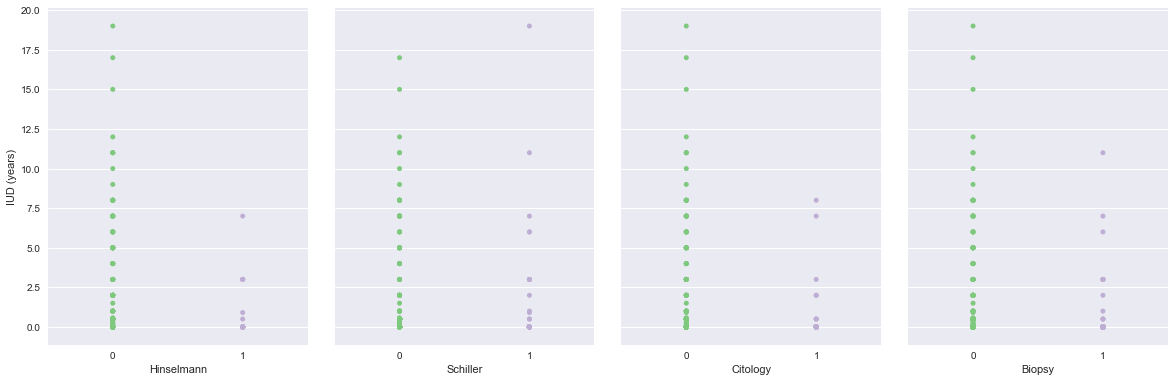

In [26]:
g = sns.PairGrid(cancer_df,
                 y_vars=['IUD (years)'],
                 x_vars= category_df,
                 aspect=.75, size=5.5)
g.map(sns.stripplot, palette="Accent");
print('The distribution of zero(negative test result) shows that the IUD used for any number of years has less chance of facing risk of cancer.')

In [27]:
cancer_df_features = cancer_df.drop(['Hinselmann', 'Schiller', 'Citology','Biopsy'],axis=1)
cancer_df_label = pd.DataFrame(data=cancer_df['Hinselmann'])
cancer_df_label['Schiller'] = cancer_df['Schiller']
cancer_df_label['Citology'] = cancer_df['Citology']
cancer_df_label['Biopsy'] = cancer_df['Biopsy']

In [28]:
print('There are 4 target variables in the dataset. For building the model, I have considered a new variable cervical_cancer which is the sum of the 4 target variables. That is, Cervical_cancer = Hinselmann + Schiller + Citology + Biopsy Which gives five different values ranging from 0 to 4. These values represent the level of risk i.e. 0 represent no risk and 4 represents higher level of risk. So, the final class/target variables are 0, 1, 2, 3, 4.')

There are 4 target variables in the dataset. For building the model, I have considered a new variable cervical_cancer which is the sum of the 4 target variables. That is, Cervical_cancer = Hinselmann + Schiller + Citology + Biopsy Which gives five different values ranging from 0 to 4. These values represent the level of risk i.e. 0 represent no risk and 4 represents higher level of risk. So, the final class/target variables are 0, 1, 2, 3, 4.


In [29]:
def cervical_cancer(cancer_label):
    hil, sch, cit, bio = cancer_label
    return hil+sch+cit+bio
cancer_df_label['cervical_cancer'] = cancer_df_label[['Hinselmann', 'Schiller', 'Citology','Biopsy']].apply(cervical_cancer,axis=1)

In [30]:
cancer_df_label.drop(['Hinselmann', 'Schiller', 'Citology','Biopsy'],axis=1,inplace=True)
print('Value counts of each target variable:',cancer_df_label['cervical_cancer'].value_counts())
cancer_df_label = cancer_df_label.astype(int)
cancer_df_label = cancer_df_label.values.ravel()

print('Final feature vector shape:',cancer_df_features.shape)
print('Final target vector shape',cancer_df_label.shape)

Value counts of each target variable: 0    756
1     41
3     33
2     22
4      6
Name: cervical_cancer, dtype: int64
Final feature vector shape: (858, 26)
Final target vector shape (858,)


In [31]:
# As there are only 6 data points in the class 4, it is difficult to train 
# and test the model. To overcome this problem of imbalance, 
# oversampling technique is used with SMOTE.

In [32]:
from imblearn.over_sampling import SMOTE, ADASYN
cancer_df_features_ovr, cancer_df_label_ovr = SMOTE().fit_sample(cancer_df_features, cancer_df_label)
print(cancer_df_features_ovr.shape)
print(cancer_df_label_ovr.shape)

(3780, 26)
(3780,)


In [33]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
x_train, x_test, y_train, y_test = train_test_split(cancer_df_features_ovr,cancer_df_label_ovr, test_size=0.30, random_state=101)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [35]:
# SVM Classifier
svmclf = svm.SVC(gamma='scale')
svmclf.fit(x_train,y_train)
svmpredicted=svmclf.predict(x_test)


#LogisticRegression Model
logistic=LogisticRegression()
logistic.fit(x_train,y_train)
logispredicted=logistic.predict(x_test)


#RandomForest Classifier
randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(x_train, y_train)
predicted = randomforest.predict(x_test)


#DecisionTree Classifier
decisiontree = DecisionTreeClassifier(random_state=42)
decisiontree.fit(x_train, y_train)
decisiontree_predicted = decisiontree.predict(x_test)

#KNN
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)
knn_predicted = knn.predict(x_test)




C:\Users\motam\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [36]:
print('Accuracyes:')
print('SVM:                ',accuracy_score(y_test,svmpredicted)*100)
print('Logestic Regression:',accuracy_score(y_test,logispredicted)*100)
print('Random Forest:      ',accuracy_score(y_test,predicted)*100)
print('Decision tree:      ',accuracy_score(y_test, decisiontree_predicted)*100)
print('KNN:                ',accuracy_score(y_test, knn_predicted)*100)

Accuracyes:
SVM:                 43.03350970017637
Logestic Regression: 41.53439153439153
Random Forest:       95.85537918871252
Decision tree:       90.38800705467372
KNN:                 85.00881834215167


In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print("training accuracy :",randomforest.score(x_train,y_train))
print("Testing Accuracy  :",randomforest.score(x_test,y_test))
print(classification_report(y_test,predicted))
print(confusion_matrix(y_test,predicted))


training accuracy : 0.999244142101285
Testing Accuracy  : 0.9585537918871252
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       224
           1       0.94      0.92      0.93       238
           2       0.99      0.98      0.98       217
           3       0.94      0.97      0.95       228
           4       0.99      1.00      0.99       227

    accuracy                           0.96      1134
   macro avg       0.96      0.96      0.96      1134
weighted avg       0.96      0.96      0.96      1134

[[207  10   0   7   0]
 [  8 220   1   8   1]
 [  2   1 213   0   1]
 [  2   2   2 221   1]
 [  1   0   0   0 226]]


In [38]:
random_forest=RandomForestClassifier()
random_forest.fit(cancer_df_features,cancer_df_label)

RandomForestClassifier()

In [39]:
print('Testing the model:',random_forest.predict(np.array([[19,1,17,1,1,3.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])))

Testing the model: [0]


In [40]:
print('Testing the model:',random_forest.predict(np.array([[51,3,17,6,34,3,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])))

Testing the model: [3]


In [41]:
print('Testing the model:',random_forest.predict(np.array([[38,2,19,5,0,0,1,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])))

Testing the model: [0]


In [42]:
print('Testing the model:',random_forest.predict(np.array([[35,5,11,2,15,15,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])))

Testing the model: [4]


In [43]:
cancer_df_features.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs,STDs (number),...,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,52,5.0,16.0,4.0,37.0,37.0,3.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
4,46,3.0,21.0,4.0,0.0,0.0,15.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [44]:
import pickle
pickle.dump(random_forest,open('modelcancerfinal.pkl','wb'))
model=pickle.load(open('modelcancerfinal.pkl','rb'))

In [45]:
model.predict([[19,1,17,1,1,3.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

array([0])

In [46]:
model.predict([[19,1,17,1,3.4,0,0,0]])

ValueError: Number of features of the model must match the input. Model n_features is 26 and input n_features is 8 